In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Paths to datasets
dataset_paths = [
    '../data/marine_water_quality-2.csv',
    '../data/marine_water_quality-3.csv',
    '../data/marine_water_quality-4.csv',
    '../data/marine_water_quality-5.csv',
    '../data/marine_water_quality-6.csv'
]

In [4]:
dataset_labels = [f"Dataset_{i+1}" for i in range(len(dataset_paths))]

def load_cleaned_dataset(path):
    df = pd.read_csv(path, encoding='utf-8')
    df.columns = df.columns.str.strip()
    df.drop(columns=['Water Control Zone', 'Station', 'Dates', 'Sample No'], inplace=True, errors='ignore')
    return df


=== Dataset_1 ===
Shape: (7386, 25)
Missing values:
 Depth                                      0
5-day Biochemical Oxygen Demand (mg/L)    20
Ammonia Nitrogen (mg/L)                   11
Chlorophyll-a (μg/L)                       8
Dissolved Oxygen (%saturation)            53
Dissolved Oxygen (mg/L)                   60
E. coli (cfu/100mL)                       79
Faecal Coliforms (cfu/100mL)              98
Nitrate Nitrogen (mg/L)                    9
Nitrite Nitrogen (mg/L)                    9
Orthophosphate Phosphorus (mg/L)          10
pH                                        11
Phaeo-pigments (μg/L)                      9
Salinity (psu)                            38
Silica (mg/L)                             10
Secchi Disc Depth (M)                     60
Suspended Solids (mg/L)                    7
Temperature (°C)                          26
Total Inorganic Nitrogen (mg/L)           11
Total Kjeldahl Nitrogen (mg/L)            82
Total Nitrogen (mg/L)                     84
T

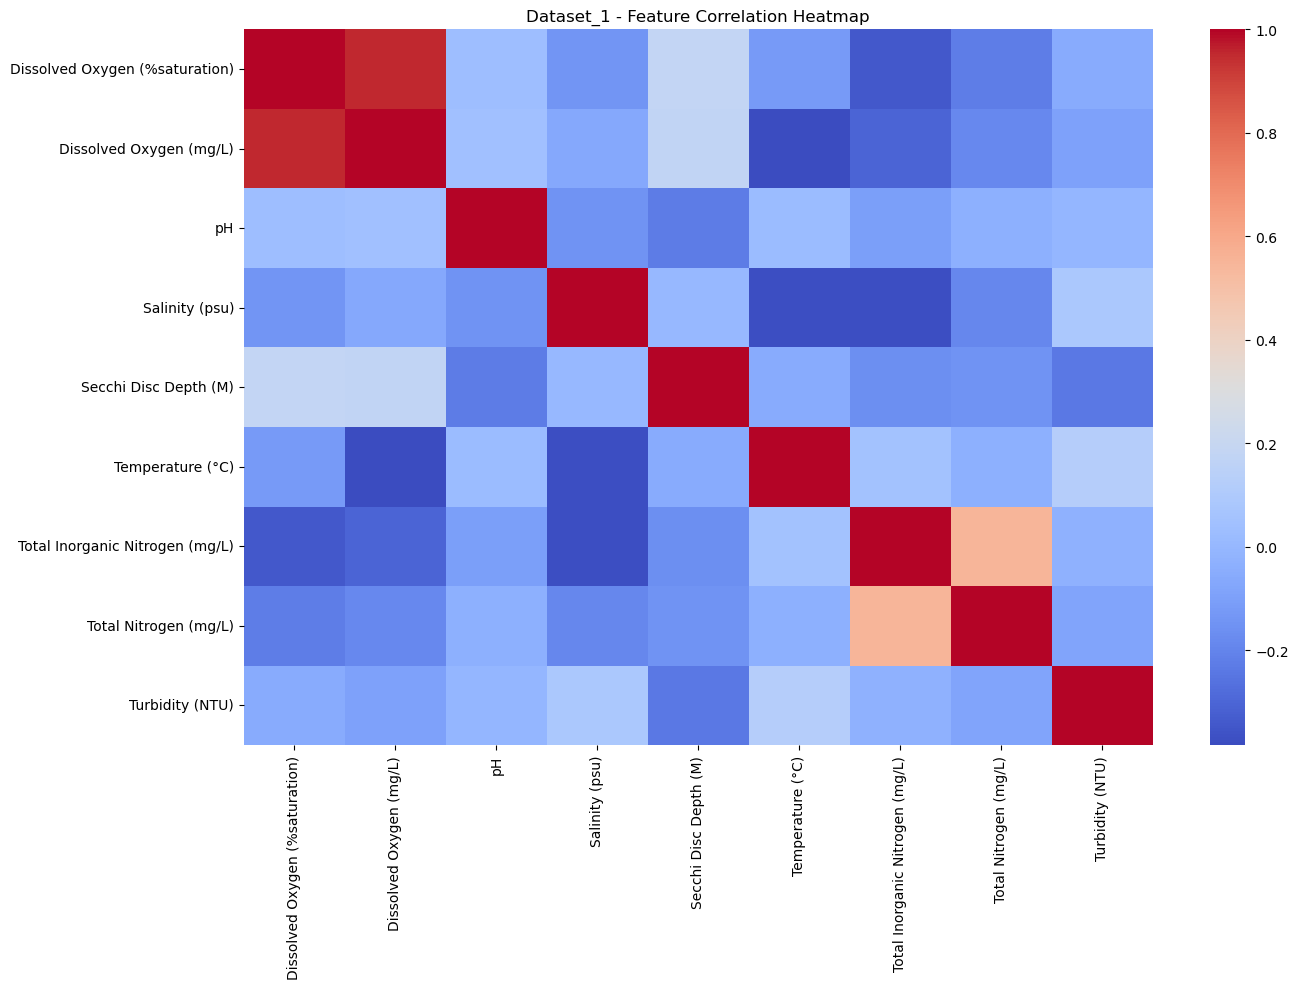

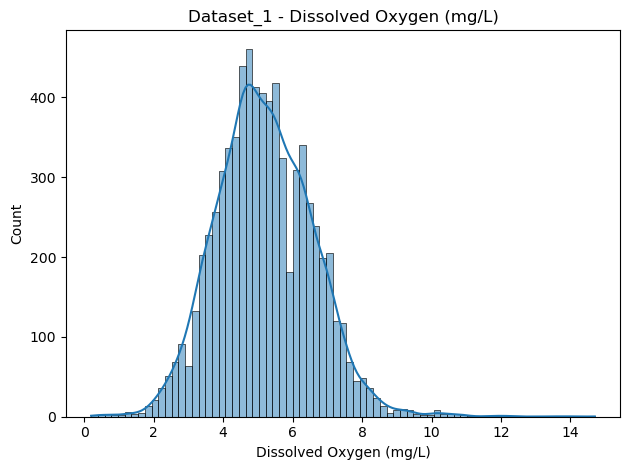

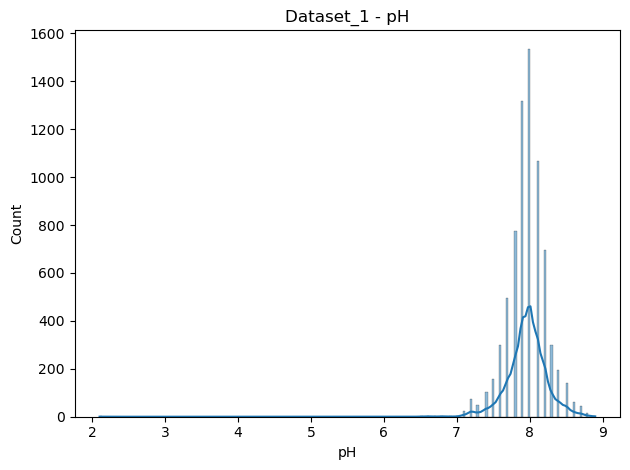

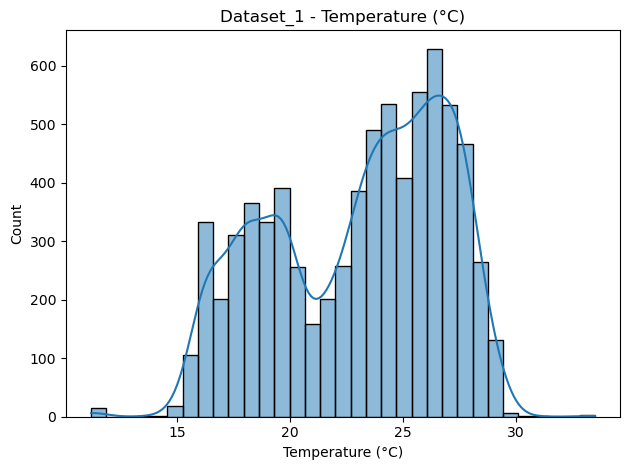

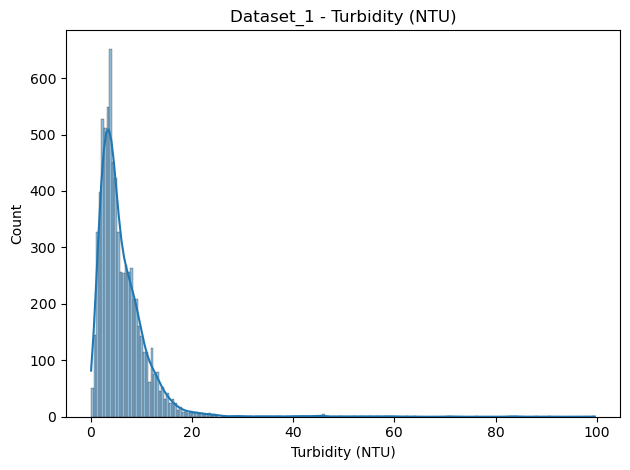


=== Dataset_2 ===
Shape: (3333, 25)
Missing values:
 Depth                                       0
5-day Biochemical Oxygen Demand (mg/L)     14
Ammonia Nitrogen (mg/L)                    23
Chlorophyll-a (μg/L)                       16
Dissolved Oxygen (%saturation)             31
Dissolved Oxygen (mg/L)                    43
E. coli (cfu/100mL)                        17
Faecal Coliforms (cfu/100mL)               17
Nitrate Nitrogen (mg/L)                    19
Nitrite Nitrogen (mg/L)                    19
Orthophosphate Phosphorus (mg/L)           23
pH                                         32
Phaeo-pigments (μg/L)                      20
Salinity (psu)                             28
Silica (mg/L)                              23
Secchi Disc Depth (M)                     100
Suspended Solids (mg/L)                    15
Temperature (°C)                           23
Total Inorganic Nitrogen (mg/L)            23
Total Kjeldahl Nitrogen (mg/L)             63
Total Nitrogen (mg/L)     

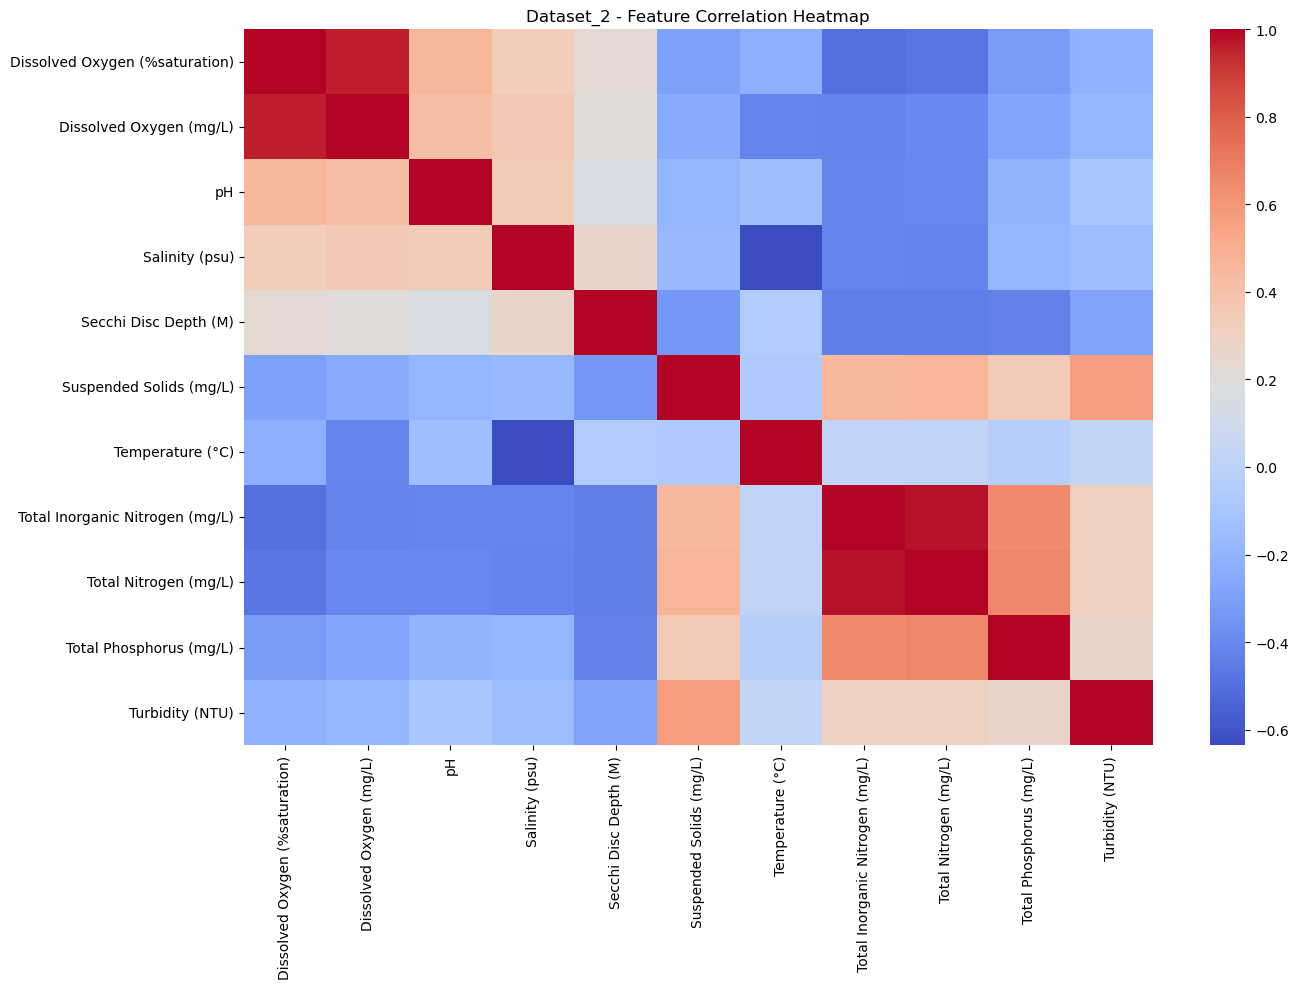

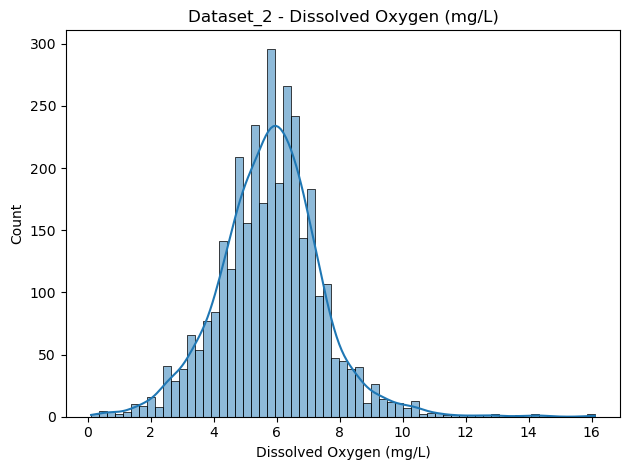

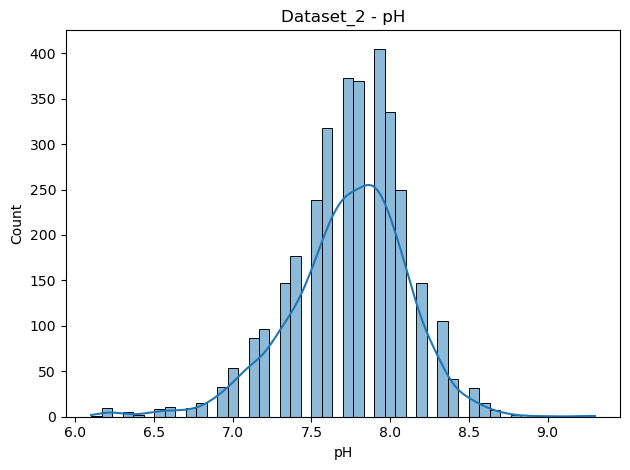

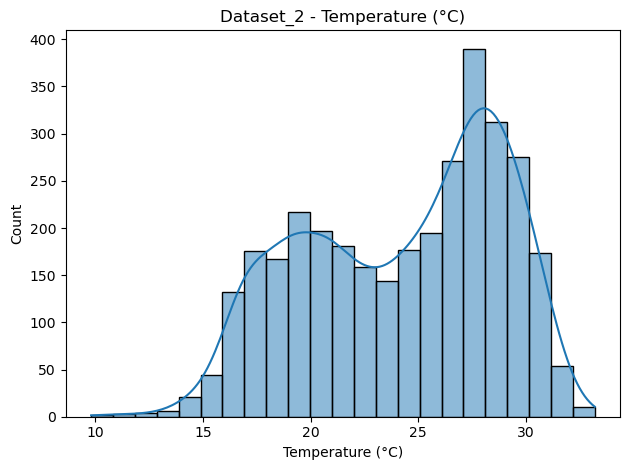

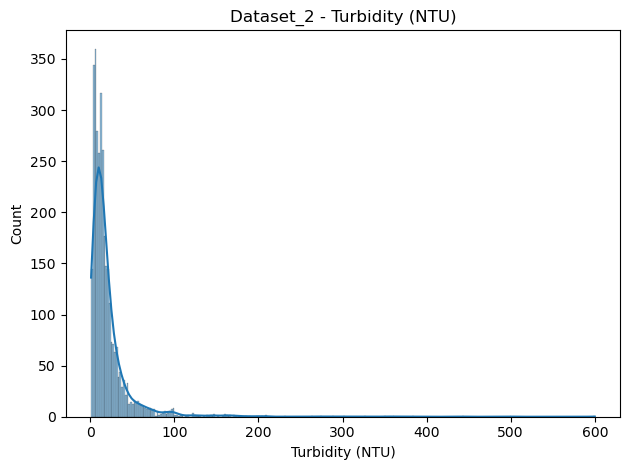


=== Dataset_3 ===
Shape: (4405, 25)
Missing values:
 Depth                                      0
5-day Biochemical Oxygen Demand (mg/L)    14
Ammonia Nitrogen (mg/L)                    7
Chlorophyll-a (μg/L)                       6
Dissolved Oxygen (%saturation)             7
Dissolved Oxygen (mg/L)                   10
E. coli (cfu/100mL)                       72
Faecal Coliforms (cfu/100mL)              71
Nitrate Nitrogen (mg/L)                    7
Nitrite Nitrogen (mg/L)                    7
Orthophosphate Phosphorus (mg/L)           7
pH                                         4
Phaeo-pigments (μg/L)                      8
Salinity (psu)                             1
Silica (mg/L)                              7
Secchi Disc Depth (M)                     15
Suspended Solids (mg/L)                   13
Temperature (°C)                           1
Total Inorganic Nitrogen (mg/L)            7
Total Kjeldahl Nitrogen (mg/L)            84
Total Nitrogen (mg/L)                     85
T

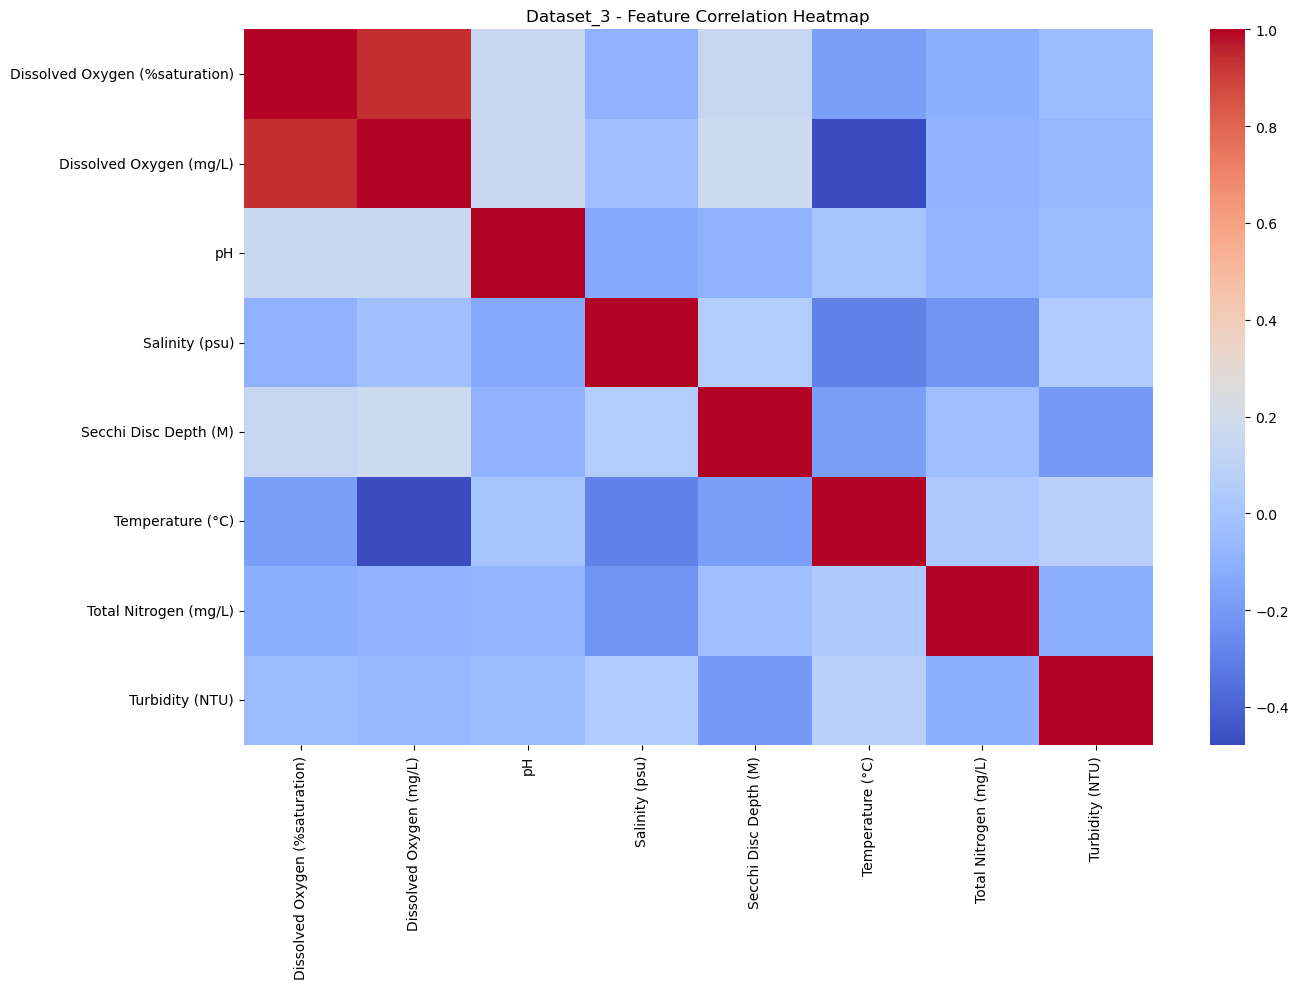

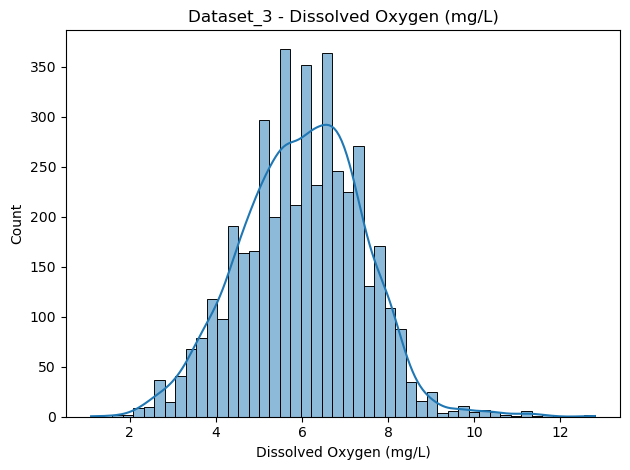

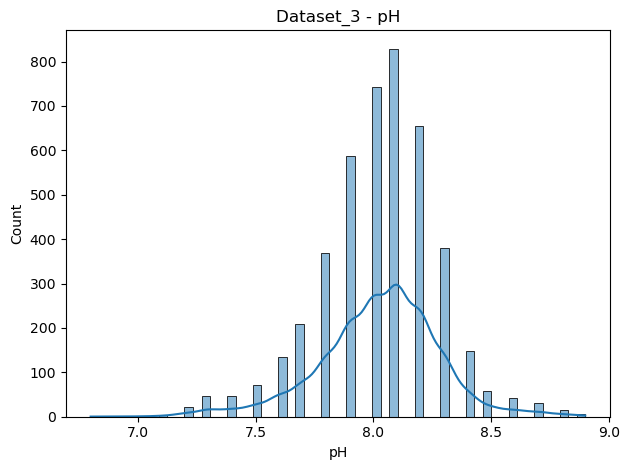

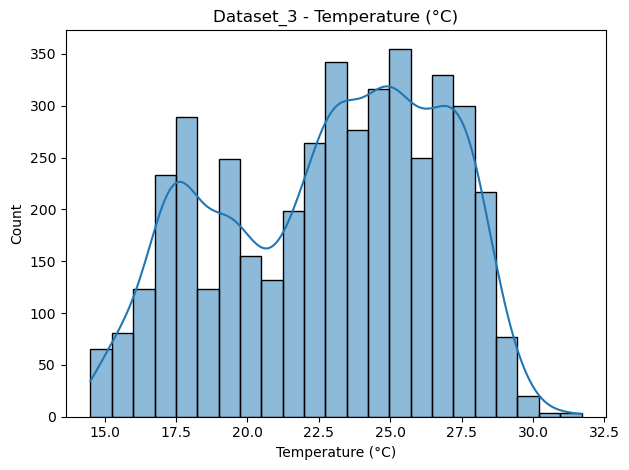

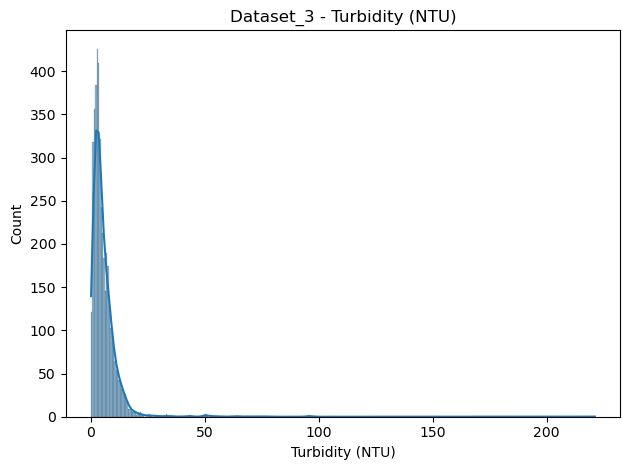


=== Dataset_4 ===
Shape: (2694, 25)
Missing values:
 Depth                                      0
5-day Biochemical Oxygen Demand (mg/L)    11
Ammonia Nitrogen (mg/L)                    9
Chlorophyll-a (μg/L)                       7
Dissolved Oxygen (%saturation)            15
Dissolved Oxygen (mg/L)                   18
E. coli (cfu/100mL)                       51
Faecal Coliforms (cfu/100mL)              51
Nitrate Nitrogen (mg/L)                   11
Nitrite Nitrogen (mg/L)                    8
Orthophosphate Phosphorus (mg/L)           8
pH                                         6
Phaeo-pigments (μg/L)                      9
Salinity (psu)                             2
Silica (mg/L)                              9
Secchi Disc Depth (M)                     17
Suspended Solids (mg/L)                    8
Temperature (°C)                           6
Total Inorganic Nitrogen (mg/L)           12
Total Kjeldahl Nitrogen (mg/L)            45
Total Nitrogen (mg/L)                     49
T

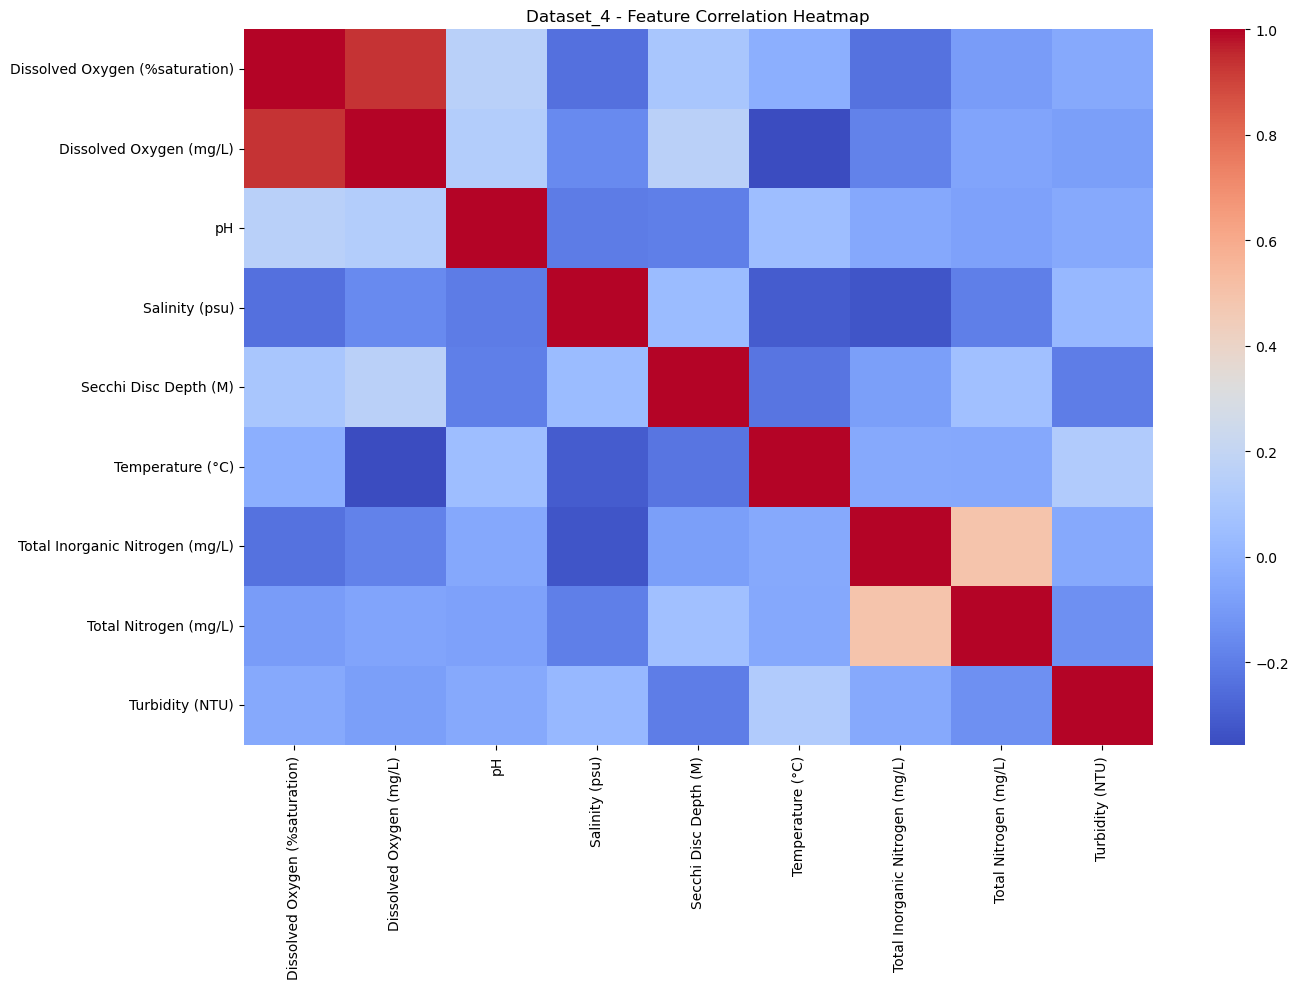

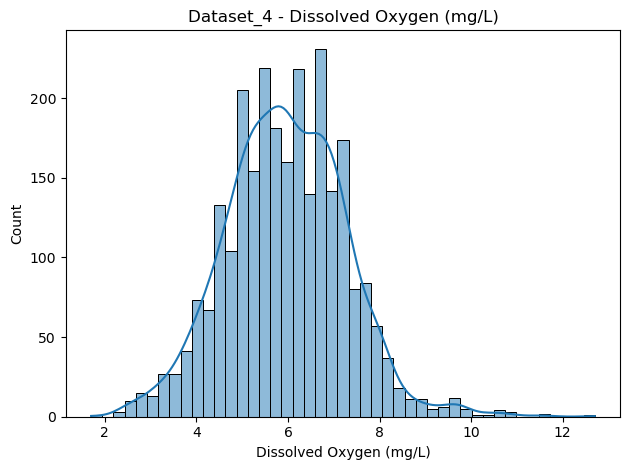

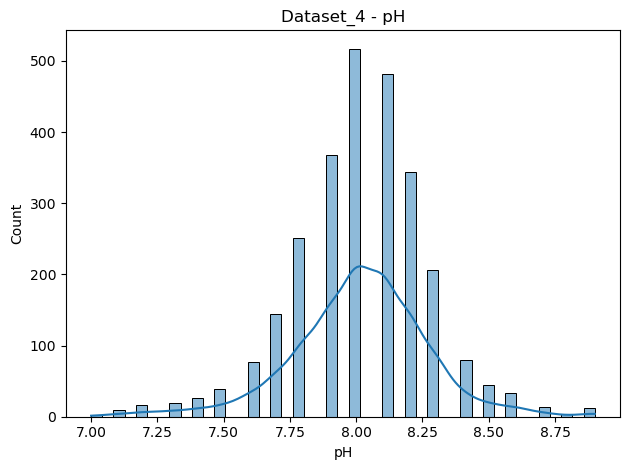

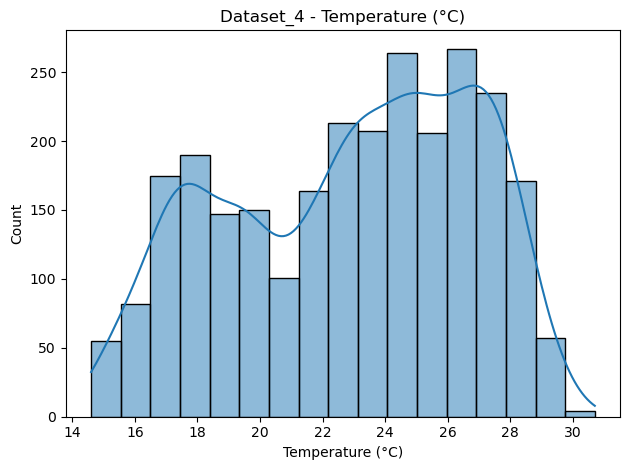

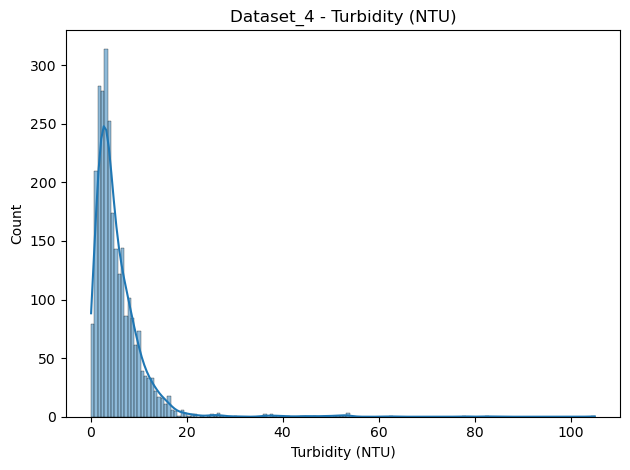


=== Dataset_5 ===
Shape: (5109, 25)
Missing values:
 Depth                                      0
5-day Biochemical Oxygen Demand (mg/L)     0
Ammonia Nitrogen (mg/L)                    0
Chlorophyll-a (μg/L)                      12
Dissolved Oxygen (%saturation)             0
Dissolved Oxygen (mg/L)                    0
E. coli (cfu/100mL)                        0
Faecal Coliforms (cfu/100mL)               0
Nitrate Nitrogen (mg/L)                    0
Nitrite Nitrogen (mg/L)                    0
Orthophosphate Phosphorus (mg/L)           0
pH                                         0
Phaeo-pigments (μg/L)                     12
Salinity (psu)                            12
Silica (mg/L)                              0
Secchi Disc Depth (M)                      0
Suspended Solids (mg/L)                    0
Temperature (°C)                           0
Total Inorganic Nitrogen (mg/L)            0
Total Kjeldahl Nitrogen (mg/L)            90
Total Nitrogen (mg/L)                     90
T

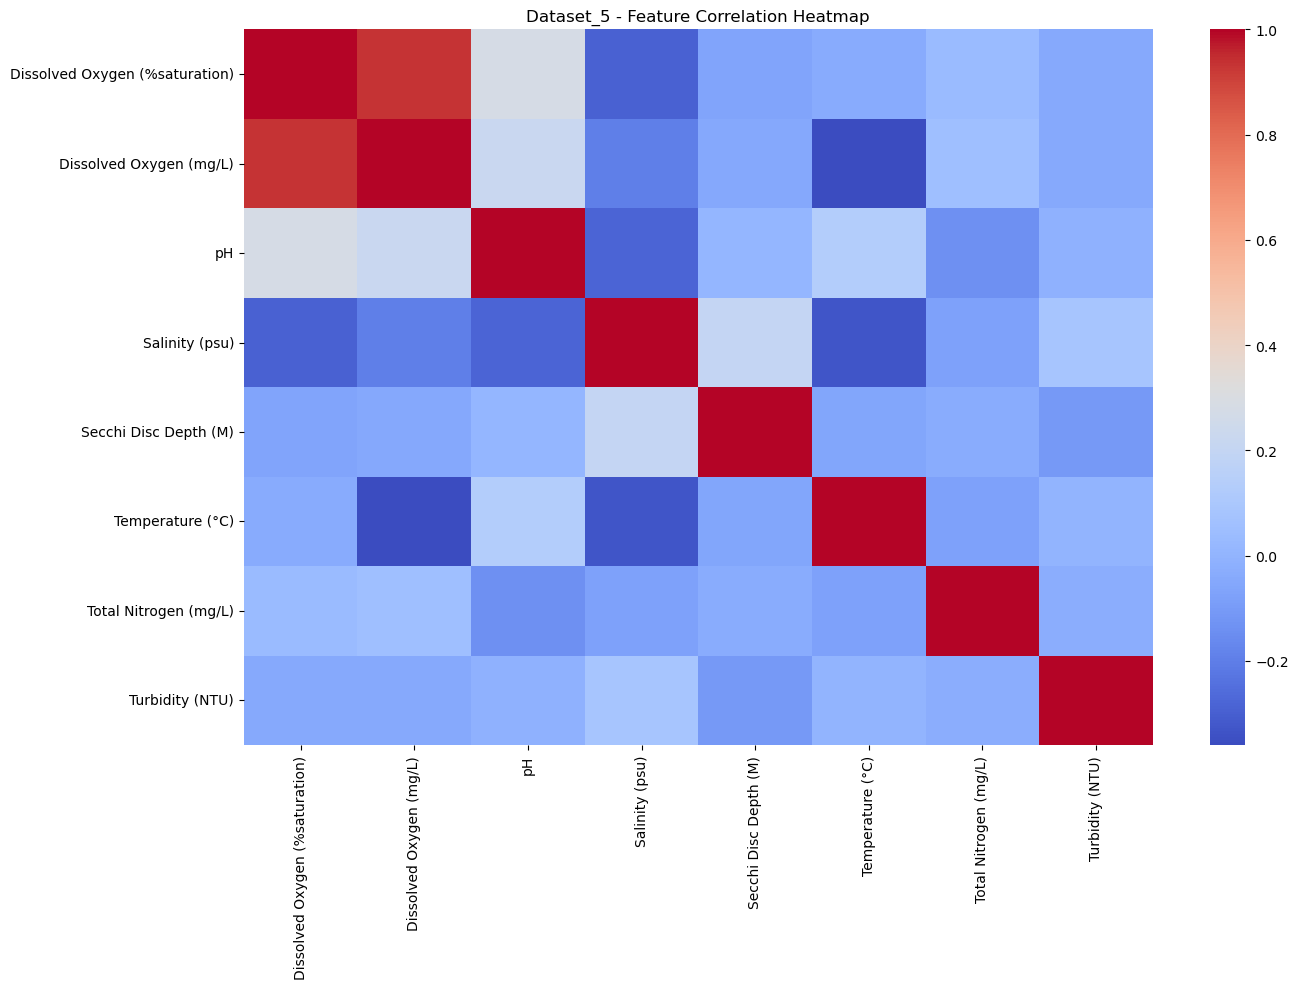

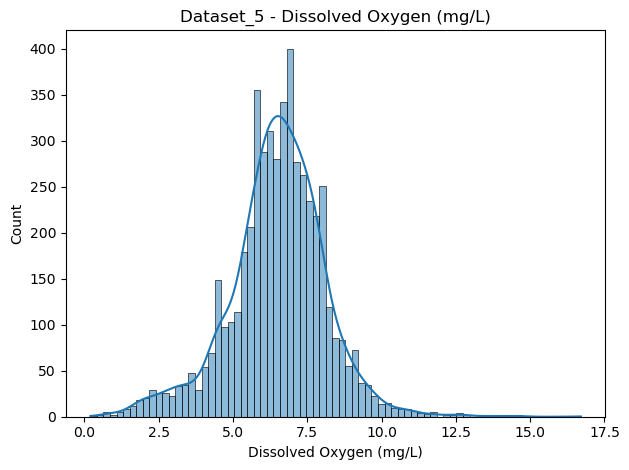

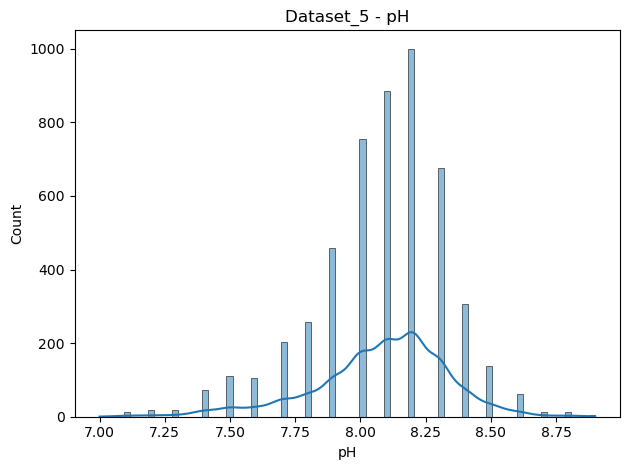

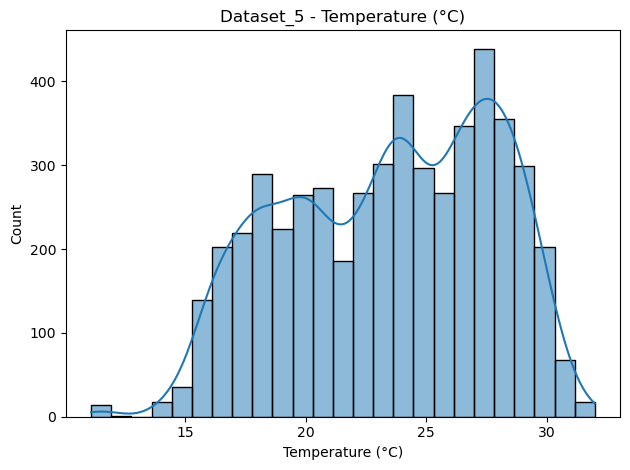

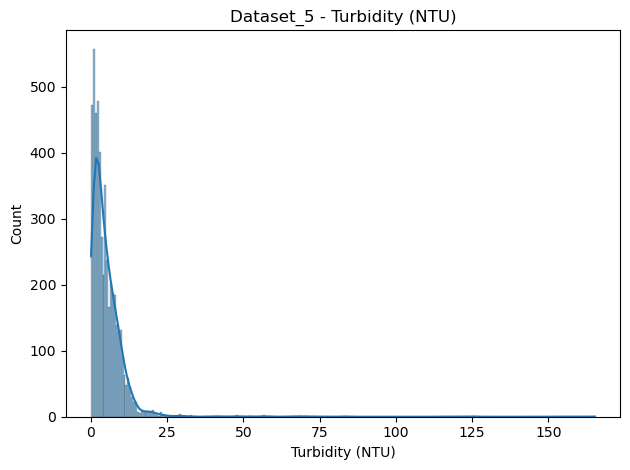

In [5]:
# EDA starts
for label, path in zip(dataset_labels, dataset_paths):
    print(f"\n=== {label} ===")
    df = load_cleaned_dataset(path)

    print("Shape:", df.shape)
    print("Missing values:\n", df.isnull().sum())
    print("Descriptive stats:\n", df.describe())

    # Heatmap of correlations
    plt.figure(figsize=(14, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
    plt.title(f'{label} - Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    # Distribution of label (if available)
    if 'label' in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x='label')
        plt.title(f'{label} - Label Distribution')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Example feature distribution
    sample_cols = ['Dissolved Oxygen (mg/L)', 'pH', 'Temperature (°C)', 'Turbidity (NTU)']
    for col in sample_cols:
        if col in df.columns:
            sns.histplot(df[col], kde=True)
            plt.title(f'{label} - {col}')
            plt.tight_layout()
            plt.show()